In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df_bit = pd.read_csv('archive/coin_Bitcoin.csv')
df_bit.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [17]:
df_bit['Target'] =(df_bit['Close'].shift(-1) > df_bit['Close']).astype(int) #se o valor de fechamento do dia seguinte for maior que o de hoje, Target = 1 (subiu), senão Target = 0 (desceu)
df_bit = df_bit.dropna()
df_bit['Target'].value_counts()

Target
1    1615
0    1376
Name: count, dtype: int64

In [12]:
x = df_bit[['Open','Close']]
y = df_bit['Target']

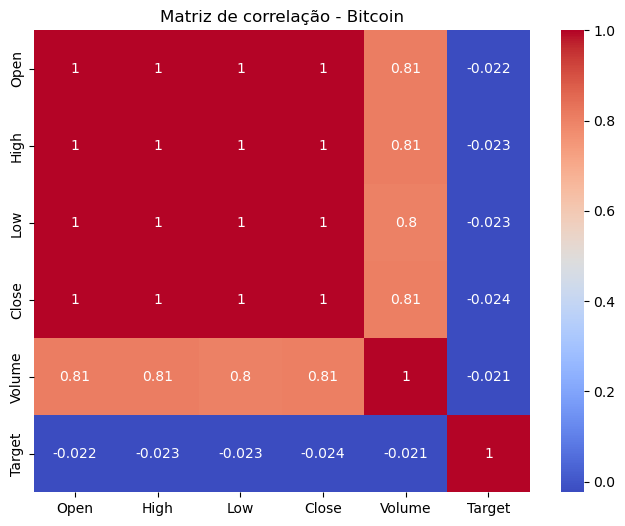

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df_bit[['Open','High','Low','Close','Volume','Target']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlação - Bitcoin')
plt.show()


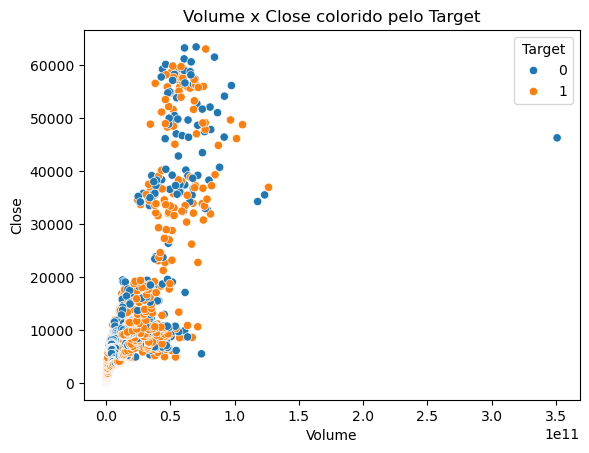

In [20]:
sns.scatterplot(x='Volume', y='Close', hue='Target', data=df_bit)
plt.title('Volume x Close colorido pelo Target')
plt.show()


Aplicação do modelo 

In [24]:
lr = LogisticRegression()
scores = cross_val_score(lr, x, y, cv=10, scoring='accuracy') # validação cruzada
print('Acurácia média:', scores.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


Acurácia média: 0.5376120401337793


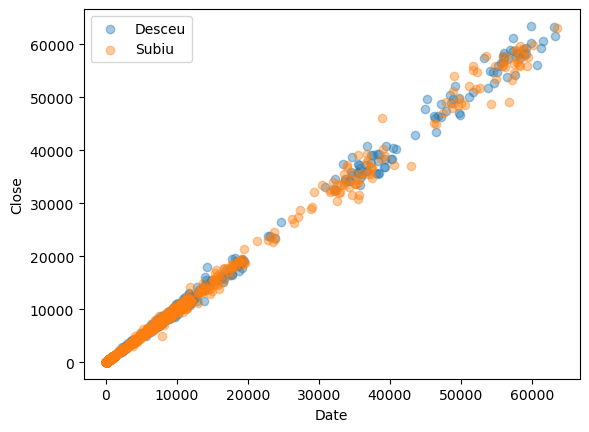

In [ ]:
def plot_scatter():
    plt.scatter(x['Open'][y == 0], x['Close'][y == 0], alpha=.4, label='Desceu')
    plt.scatter(x['Open'][y == 1], x['Close'][y == 1], alpha=.4, label='Subiu')
    plt.legend()
    plt.xlabel('Open')
    plt.ylabel('Close')
plot_scatter()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=False
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [32]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print('Matriz de confusão:')
print(confusion_matrix(y_test, y_pred))

print('\nRelatório de classificação:')
print(classification_report(y_test, y_pred))


Matriz de confusão:
[[114 165]
 [128 192]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.47      0.41      0.44       279
           1       0.54      0.60      0.57       320

    accuracy                           0.51       599
   macro avg       0.50      0.50      0.50       599
weighted avg       0.51      0.51      0.51       599

